In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps

c = Census('85ac64b6b5a9c0901b00329d1ef41f0c53ccfc98', year=2017)

file = pd.read_csv('atx_crime_rates_2011-2016.csv')
zillow = pd.read_csv('atx_mean_zhvi_2009-2017.csv')

In [2]:
zillow.head()

,year,Zip Code,ZHVI_AllHomes
0,2009,78610,180533.33
1,2009,78613,190950.00
2,2009,78617,116075.00
3,2009,78641,153816.67
4,2009,78664,138175.00


In [3]:
df_what_year = pd.merge(file, zillow, on=['year','Zip Code'])
zillow_file = df_what_year.loc[df_what_year['year'] == 2016]
zillow_file.head()

,year,Zip Code,Reports,Population,"Crime Rate per 100,000 people",ZHVI_AllHomes
188,2016,78610,4,30452,13.1,223716.67
189,2016,78613,506,75279,672.2,253908.33
190,2016,78617,941,26126,3601.8,160600.00
191,2016,78664,6,60884,9.9,182991.67
192,2016,78681,4,56086,7.1,260508.33


In [4]:
zillow_file.head()

zillow_file = zillow_file.drop("year", axis = 1)
zillow_file.to_csv('zillow_file.csv')

In [5]:
zillow_new = pd.read_csv('zillow_file.csv')
# zillow_new = zillow_new.drop([5])

In [6]:
zillow_new['Zip Code'] = zillow_new['Zip Code'].astype('str')
zillow_new= zillow_new.sort_values(['ZHVI_AllHomes'], ascending=[True])

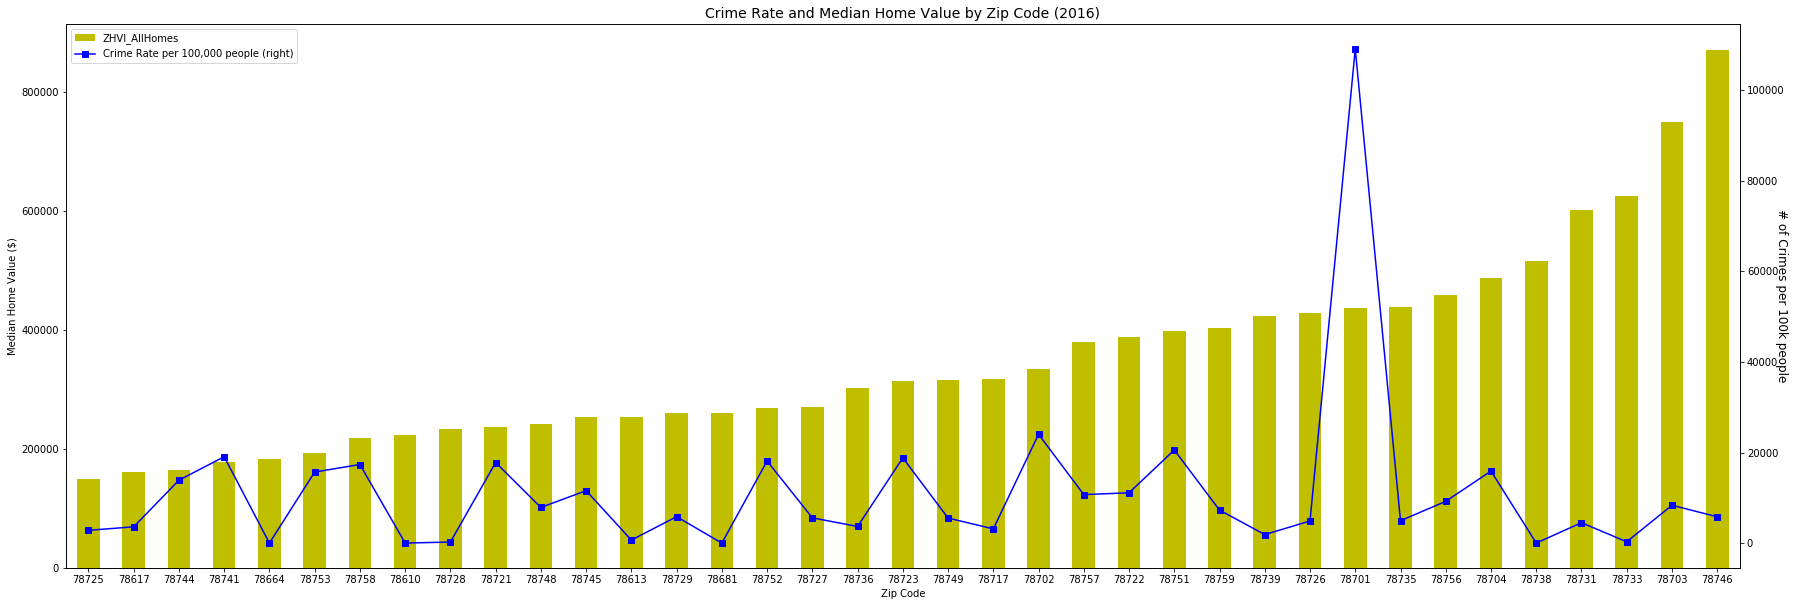

<Figure size 432x288 with 0 Axes>

In [7]:
ax1 = zillow_new.plot('Zip Code','ZHVI_AllHomes',kind='bar', color = 'y',figsize=(30, 10))
zillow_new.plot('Zip Code','Crime Rate per 100,000 people',kind='line', style =['bs-'], secondary_y=True, ax=ax1)
ax1.set_ylabel('Median Home Value ($)', fontsize=10)
plt.ylabel('# of Crimes per 100k people', fontsize=12, rotation=-90)
plt.title("Crime Rate and Median Home Value by Zip Code (2016)", fontsize=14)
# plt.savefig('idk.png', bbox_inches='tight')
fig = plt.figure()

In [8]:
bins = [0, 199999, 299999, 399999, 499999, 599999, 699999, 799999, 1099999]
group_labels = ["100k-199k", "200k-299k", "300k-399k", "400k-499k", "500k-599k",
                "600k-699k", "700k-799k", ">800k"]
zillow_file["Median Home Value"] = pd.cut(zillow_file["ZHVI_AllHomes"], bins, labels=group_labels)

In [9]:
df_group = zillow_file.groupby('Median Home Value')
number_crime = df_group["Reports"].max()
df_graph_one = pd.DataFrame({"Number of Crimes": number_crime
                                
                                   })

df_graph_one

,Number of Crimes
Median Home Value,
100k-199k,9917
200k-299k,8072
300k-399k,6117
400k-499k,8075
500k-599k,2
600k-699k,1235
700k-799k,1740
>800k,1627


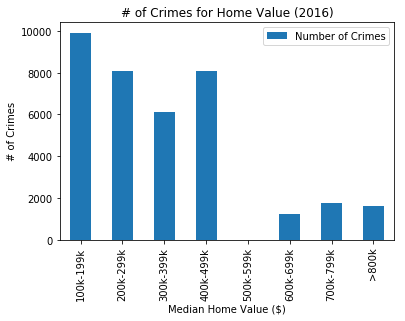

<Figure size 432x288 with 0 Axes>

In [10]:
bar_chart = df_graph_one.plot(kind="bar", title="# of Crimes for Home Value (2016)")
bar_chart.set_xlabel("Median Home Value ($)")
bar_chart.set_ylabel("# of Crimes")
fig = plt.figure()

In [11]:
zillow_file.head()

,Zip Code,Reports,Population,"Crime Rate per 100,000 people",ZHVI_AllHomes,Median Home Value
188,78610,4,30452,13.1,223716.67,200k-299k
189,78613,506,75279,672.2,253908.33,200k-299k
190,78617,941,26126,3601.8,160600.00,100k-199k
191,78664,6,60884,9.9,182991.67,100k-199k
192,78681,4,56086,7.1,260508.33,200k-299k


In [12]:
bin_two = [0, 19999, 29999, 39999, 49999, 59999, 69999, 799999]
group_labels_two = ["<19k", "20k-29k", "30k-39k", "40k-49k", "50k-59k",
                "60k-69k", "<70k"]
# df_graph_two.to_csv('not_sure.csv')
zillow_file["Population Range"] = pd.cut(zillow_file["Population"], bin_two, labels=group_labels_two)

In [13]:
cen_group = zillow_file.groupby('Population Range')
number_crimes = cen_group["Reports"].sum()
df_graph_two = pd.DataFrame({"Number of Crimes":number_crimes
                                   })

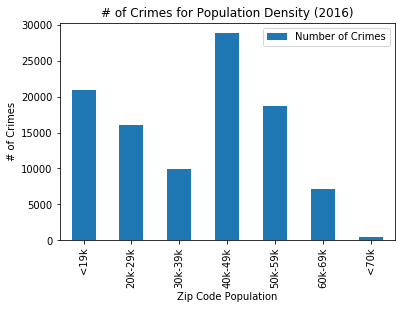

<Figure size 432x288 with 0 Axes>

In [14]:
bar_chart = df_graph_two.plot(kind="bar", title="# of Crimes for Population Density (2016)")
bar_chart.set_xlabel("Zip Code Population")
bar_chart.set_ylabel("# of Crimes")
fig = plt.figure()